In [79]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# Creating sample regression data

    Introdction to Regression with NN in tensorflow

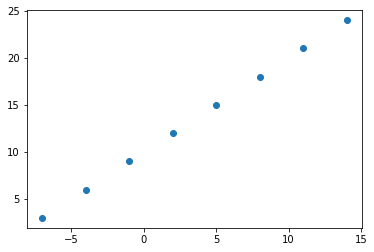

In [48]:
# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulaize it
plt.scatter(x,y)

In [10]:
# Create a demo tensor for out housing privce prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [12]:
x[0], y[0]

(-7.0, 3.0)

In [13]:
x[1], y[1]

(-4.0, 6.0)

In [14]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

# looks like input and output shape have no shape

((), ())

In [49]:
# Turn out numpy arrays into tensors with float32
x = tf.cast(tf.constant(x), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [95]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# making lists
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# adding denses
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Complie the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# 3. Fit the model
#model.fit(x, y, epochs = 5)
# tf 2.7.0 이후부턴 코드 바뀜
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 5)

Epoch 1/5
2/2 [==============================] - 0s 13ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/5
2/2 [==============================] - 0s 7ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/5
2/2 [==============================] - 0s 8ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/5
2/2 [==============================] - 0s 4ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/5
2/2 [==============================] - 0s 5ms/step - loss: 15.5388 - mae: 15.5388


2022-08-16 18:37:44.771904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
# check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [90]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

# epochs수가 너무 적어서 예측이 잘 안됨.

1/1 [==============================] - 0s 18ms/step


array([[21.234158]], dtype=float32)

# Steps in improving a model with tf

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# making lists
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Complie the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# 3. Fit the model
#model.fit(x, y, epochs = 5)
# tf 2.7.0 이후부턴 코드 바뀜
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 314ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 5m

2022-08-15 22:36:03.394450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 7ms/step - loss: 8.8548 - mae: 8.8548
Epoch 22/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7223 - mae: 8.7223
Epoch 23/100
1/1 [==============================] - 0s 7ms/step - loss: 8.5898 - mae: 8.5898
Epoch 24/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4573 - mae: 8.4573
Epoch 25/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3248 - mae: 8.3248
Epoch 26/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1923 - mae: 8.1923
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0598 - mae: 8.0598
Epoch 28/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9273 - mae: 7.9273
Epoch 29/100
1/1 [==============================] - 0s 4ms/step - loss: 7.7948 - mae: 7.7948
Epoch 30/100
1/1 [==============================] - 0s 8ms/step - loss: 7.6623 - mae: 7.6623
Epoch 31/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5298 - ma

In [55]:
model.predict([11.0])

1/1 [==============================] - 0s 13ms/step


array([[19.808155]], dtype=float32)

In [128]:
# Create a larger model

#tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
  #  tf.keras.layers.Dense(100, activation='relu'),
 #   tf.keras.layers.Dense(100, activation='relu'),   # adding layers, change the activation func, increase hidden units
#    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)  # output layer
])

# 2. Compile the model
model.compile(loss = 'mae',
             optimizer = tf.keras.optimizers.Adam(lr = 0.01),   # change the optimization func, change the learning rate
             metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 195ms/step - loss: 12.1892 - mae: 12.1892
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8147 - mae: 10.8147
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1129 - mae: 10.1129
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3993 - mae: 9.3993
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6719 - mae: 8.6719
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.9279 - mae: 7.9279
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1646 - mae: 7.1646
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8576 - mae: 6.8576
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.1579 - mae: 7.1579
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - los

2022-08-15 22:53:29.973818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 7ms/step - loss: 6.7420 - mae: 6.7420
Epoch 18/100
1/1 [==============================] - 0s 5ms/step - loss: 6.4556 - mae: 6.4556
Epoch 19/100
1/1 [==============================] - 0s 7ms/step - loss: 6.2276 - mae: 6.2276
Epoch 20/100
1/1 [==============================] - 0s 8ms/step - loss: 6.1834 - mae: 6.1834
Epoch 21/100
1/1 [==============================] - 0s 5ms/step - loss: 6.1887 - mae: 6.1887
Epoch 22/100
1/1 [==============================] - 0s 8ms/step - loss: 6.2645 - mae: 6.2645
Epoch 23/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2358 - mae: 6.2358
Epoch 24/100
1/1 [==============================] - 0s 9ms/step - loss: 6.1160 - mae: 6.1160
Epoch 25/100
1/1 [==============================] - 0s 7ms/step - loss: 5.9150 - mae: 5.9150
Epoch 26/100
1/1 [==============================] - 0s 8ms/step - loss: 5.7328 - mae: 5.7328
Epoch 27/100
1/1 [==============================] - 0s 8ms/step - loss: 5.6302 - ma

In [69]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [134]:
model.predict([8.0])

1/1 [==============================] - 0s 14ms/step


array([[18.89208]], dtype=float32)

# Evaluating a model

In [ ]:
# Visualize is the most important way to evaluate a model

In [88]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [5]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

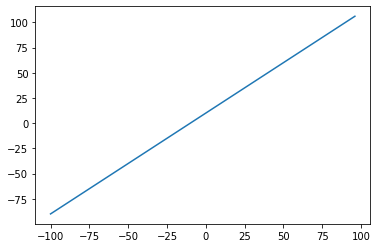

In [6]:
# Visualize the data

plt.plot(x,y)
plt.show()

In [7]:
# The 3 sets...

# training set 
# validataion set
# test set

In [8]:
# Check the length of how many samples we have
len(x)

50

In [9]:
# split the data into train and test sets
x_train = x[:40]
y_train = y[:40]

x_test = x[40: ]
y_test = y[40:]


len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

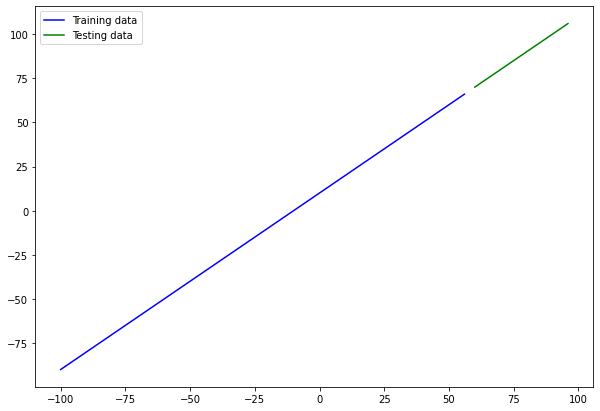

In [10]:
# Visualizing the data

plt.figure(figsize = (10,7))
plt.plot(x_train, y_train, c = 'b', label = 'Training data')
plt.plot(x_test, y_test, c = 'g', label = 'Testing data')
plt.legend();

In [11]:
# Let's have a look at how  to build a NN for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complie a model
model.compile(loss = 'mae',
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# 3. Fit the model
#model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

In [12]:
# Visualizing a model

model.summary()

# error 바랫ㅇ

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [46]:
# Let's create a model which builds automatically bt defining the input_shape argument in the first layer

tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input_layer1'), # input_shape : 들어가는 데이터(위에선 1개)
    tf.keras.layers.Dense(1, name = 'output_layer')
], name = "model1")

# 2. Complie a model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# 3. Fit the model
#model.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

In [47]:
model.summary()

# fully connected model
# param: total number of parameters in the model(x, y)
# trainable parameters: 노드 수 * input_shape + 노드 수 = 2

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms

2022-08-15 23:49:15.756962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 5ms/step - loss: 25.2803 - mae: 25.2803
Epoch 13/100
2/2 [==============================] - 0s 5ms/step - loss: 16.9897 - mae: 16.9897
Epoch 14/100
2/2 [==============================] - 0s 5ms/step - loss: 25.9217 - mae: 25.9217
Epoch 15/100
2/2 [==============================] - 0s 4ms/step - loss: 17.9948 - mae: 17.9948
Epoch 16/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3510 - mae: 7.3510
Epoch 17/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8636 - mae: 10.8636
Epoch 18/100
2/2 [==============================] - 0s 6ms/step - loss: 19.5304 - mae: 19.5304
Epoch 19/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3469 - mae: 10.3469
Epoch 20/100
2/2 [==============================] - 0s 4ms/step - loss: 17.6985 - mae: 17.6985
Epoch 21/100
2/2 [==============================] - 0s 6ms/step - loss: 15.8984 - mae: 15.8984
Epoch 22/100
2/2 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 5ms/step - loss: 11.5653 - mae: 11.5653
Epoch 99/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8827 - mae: 13.8827
Epoch 100/100
2/2 [==============================] - 0s 6ms/step - loss: 20.2277 - mae: 20.2277


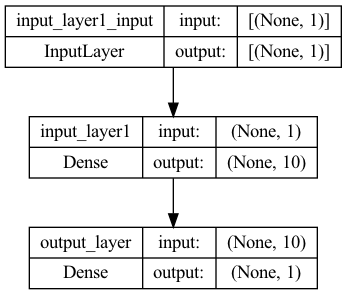

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

## Visualizing our model's predictions

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [86]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 9ms/step


array([[ 70.55218 ],
       [ 75.1399  ],
       [ 79.72763 ],
       [ 84.315346],
       [ 88.90307 ],
       [ 93.4908  ],
       [ 98.078514],
       [102.66624 ],
       [107.25397 ],
       [111.84169 ]], dtype=float32)

In [52]:
# Let's create a plotting function
def plot_predictions(train_data = x_train, train_labels = y_train, test_data = x_test, test_labels = y_test, predictions = y_pred):
    plt.figure(figsize = (10,7))
    plt.scatter(train_data, train_labels, c = 'b', label = 'Training data')
    plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data')
    plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
    plt.legend()
    plt.show()

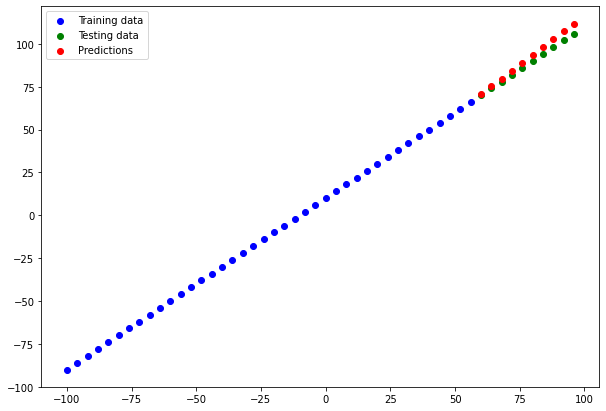

In [53]:
plot_predictions()

## Evaluating our model's predictions with regression evaluation metrics

    - MAE(mean absolute error)
    - MSE(mean square error)

In [84]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 3.1969 - mae: 3.1969


[3.1969330310821533, 3.1969330310821533]

In [62]:
# Calcuate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

# Must reshaping tensors

<tf.Tensor: shape=(), dtype=float32, numpy=3.196933>

In [63]:
# Calculate MSE

mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070086>

In [71]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

In [65]:
# model_1 -> same as the original model
# model_2 -> 2 layers, trained for 100 epochs
# model_3 -> 2 layers, trained for 500 epochs

In [67]:
# Build model_1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])
model_1.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - 

2022-08-16 18:27:52.696566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step - loss: 10.6639 - mae: 10.6639
Epoch 13/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7977 - mae: 9.7977
Epoch 14/100
2/2 [==============================] - 0s 6ms/step - loss: 16.0103 - mae: 16.0103
Epoch 15/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4068 - mae: 11.4068
Epoch 16/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5393 - mae: 8.5393
Epoch 17/100
2/2 [==============================] - 0s 4ms/step - loss: 13.6348 - mae: 13.6348
Epoch 18/100
2/2 [==============================] - 0s 5ms/step - loss: 11.4629 - mae: 11.4629
Epoch 19/100
2/2 [==============================] - 0s 7ms/step - loss: 17.9148 - mae: 17.9148
Epoch 20/100
2/2 [==============================] - 0s 9ms/step - loss: 15.0494 - mae: 15.0494
Epoch 21/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0216 - mae: 11.0216
Epoch 22/100
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 9.4693 - mae: 9.4693
Epoch 100/100
2/2 [==============================] - 0s 4ms/step - loss: 8.7067 - mae: 8.7067


1/1 [==============================] - 0s 10ms/step


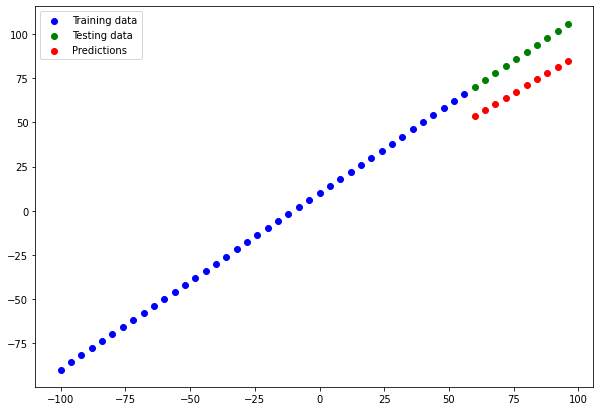

In [82]:
# make and plot predictions for model_1
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions = y_pred_1)

In [72]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745329>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [76]:
# Build model_2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mse'])

model_2.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 20ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0088
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 29.3236 - mse: 1200.5778

2022-08-16 18:35:31.641720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4381
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2473 - mse: 147.9359
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 25.2803 - mse: 890.3867
Epoch 13/100
2/2 [==============================] - 0s 5ms/step - loss: 16.9897 - mse: 399.9679
Epoch 14/100
2/2 [==============================] - 0s 5ms/step - loss: 25.9217 - mse: 1049.5520
Epoch 15/100
2/2 [==============================] - 0s 5ms/step - loss: 17.9948 - mse: 450.2582
Epoch 16/100
2/2 [==============================] - 0s 5ms/step - loss: 7.3510 - mse: 80.6206
Epoch 17/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8636 - mse: 174.7868
Epoch 18/100
2/2 [==============================] - 0s 5ms/step - loss: 19.5304 - mse: 565.8051
Epoch 19/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3469 - mse: 167.7749
Epoch 20/100
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 11.1144 - mse: 164.0821
Epoch 96/100
2/2 [==============================] - 0s 6ms/step - loss: 19.4346 - mse: 510.5843
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 12.1593 - mse: 209.9755
Epoch 98/100
2/2 [==============================] - 0s 6ms/step - loss: 11.5653 - mse: 169.4051
Epoch 99/100
2/2 [==============================] - 0s 10ms/step - loss: 13.8827 - mse: 265.4630
Epoch 100/100
2/2 [==============================] - 0s 6ms/step - loss: 20.2277 - mse: 608.8218


1/1 [==============================] - 0s 12ms/step


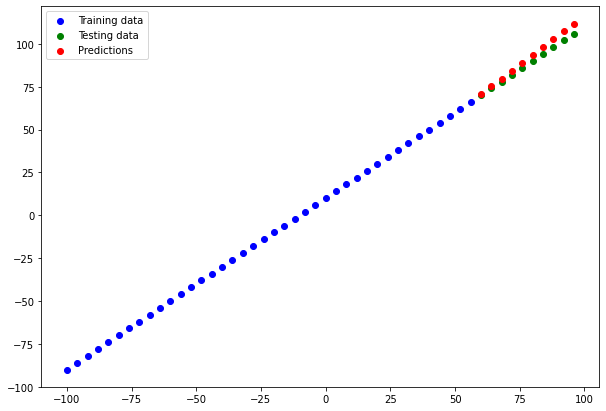

In [80]:
# make and plot predictions for model_2
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions = y_pred_2)

In [96]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.196933>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070086>)

In [104]:
# Build model_3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mse'])

model_3.fit(tf.expand_dims(x_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 18ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6622
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0088
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 29.3236 - mse: 1200.5778

2022-08-16 18:43:18.373021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mse: 1094.4381
Epoch 11/500
2/2 [==============================] - 0s 7ms/step - loss: 10.2473 - mse: 147.9359
Epoch 12/500
2/2 [==============================] - 0s 8ms/step - loss: 25.2803 - mse: 890.3867
Epoch 13/500
2/2 [==============================] - 0s 7ms/step - loss: 16.9897 - mse: 399.9679
Epoch 14/500
2/2 [==============================] - 0s 6ms/step - loss: 25.9217 - mse: 1049.5520
Epoch 15/500
2/2 [==============================] - 0s 5ms/step - loss: 17.9948 - mse: 450.2582
Epoch 16/500
2/2 [==============================] - 0s 5ms/step - loss: 7.3510 - mse: 80.6206
Epoch 17/500
2/2 [==============================] - 0s 5ms/step - loss: 10.8636 - mse: 174.7868
Epoch 18/500
2/2 [==============================] - 0s 5ms/step - loss: 19.5304 - mse: 565.8051
Epoch 19/500
2/2 [==============================] - 0s 6ms/step - loss: 10.3469 - mse: 167.7749
Epoch 20/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 11.1144 - mse: 164.0821
Epoch 96/500
2/2 [==============================] - 0s 6ms/step - loss: 19.4346 - mse: 510.5843
Epoch 97/500
2/2 [==============================] - 0s 5ms/step - loss: 12.1593 - mse: 209.9755
Epoch 98/500
2/2 [==============================] - 0s 5ms/step - loss: 11.5653 - mse: 169.4051
Epoch 99/500
2/2 [==============================] - 0s 5ms/step - loss: 13.8827 - mse: 265.4630
Epoch 100/500
2/2 [==============================] - 0s 6ms/step - loss: 20.2277 - mse: 608.8218
Epoch 101/500
2/2 [==============================] - 0s 5ms/step - loss: 11.4479 - mse: 177.1445
Epoch 102/500
2/2 [==============================] - 0s 5ms/step - loss: 17.4842 - mse: 426.5328
Epoch 103/500
2/2 [==============================] - 0s 5ms/step - loss: 7.0217 - mse: 65.2649
Epoch 104/500
2/2 [==============================] - 0s 7ms/step - loss: 23.5789 - mse: 757.4911
Epoch 105/500
2/2 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 10.5995 - mse: 147.8544
Epoch 180/500
2/2 [==============================] - 0s 6ms/step - loss: 7.8992 - mse: 100.6933
Epoch 181/500
2/2 [==============================] - 0s 5ms/step - loss: 17.4015 - mse: 438.6028
Epoch 182/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0088 - mse: 157.1594
Epoch 183/500
2/2 [==============================] - 0s 5ms/step - loss: 11.7027 - mse: 203.9954
Epoch 184/500
2/2 [==============================] - 0s 6ms/step - loss: 30.4061 - mse: 1387.3828
Epoch 185/500
2/2 [==============================] - 0s 6ms/step - loss: 7.5557 - mse: 98.6847
Epoch 186/500
2/2 [==============================] - 0s 5ms/step - loss: 15.9905 - mse: 369.3703
Epoch 187/500
2/2 [==============================] - 0s 6ms/step - loss: 8.5579 - mse: 85.4846
Epoch 188/500
2/2 [==============================] - 0s 5ms/step - loss: 28.7339 - mse: 1175.7046
Epoch 189/500
2/2 [============================

2/2 [==============================] - 0s 4ms/step - loss: 13.7211 - mse: 268.5680
Epoch 264/500
2/2 [==============================] - 0s 9ms/step - loss: 21.0154 - mse: 653.9620
Epoch 265/500
2/2 [==============================] - 0s 4ms/step - loss: 19.3730 - mse: 545.6241
Epoch 266/500
2/2 [==============================] - 0s 5ms/step - loss: 11.4735 - mse: 234.7203
Epoch 267/500
2/2 [==============================] - 0s 5ms/step - loss: 7.5302 - mse: 112.0906
Epoch 268/500
2/2 [==============================] - 0s 6ms/step - loss: 21.6453 - mse: 670.2258
Epoch 269/500
2/2 [==============================] - 0s 5ms/step - loss: 33.1785 - mse: 1653.7344
Epoch 270/500
2/2 [==============================] - 0s 5ms/step - loss: 10.0833 - mse: 148.7349
Epoch 271/500
2/2 [==============================] - 0s 5ms/step - loss: 12.1012 - mse: 303.1720
Epoch 272/500
2/2 [==============================] - 0s 5ms/step - loss: 26.1373 - mse: 944.6783
Epoch 273/500
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 12.8748 - mse: 281.5980
Epoch 348/500
2/2 [==============================] - 0s 5ms/step - loss: 8.1960 - mse: 162.6962
Epoch 349/500
2/2 [==============================] - 0s 4ms/step - loss: 13.5568 - mse: 261.1368
Epoch 350/500
2/2 [==============================] - 0s 5ms/step - loss: 15.4354 - mse: 333.2083
Epoch 351/500
2/2 [==============================] - 0s 5ms/step - loss: 32.9626 - mse: 1524.7935
Epoch 352/500
2/2 [==============================] - 0s 5ms/step - loss: 14.2040 - mse: 282.7507
Epoch 353/500
2/2 [==============================] - 0s 5ms/step - loss: 15.9196 - mse: 374.1918
Epoch 354/500
2/2 [==============================] - 0s 5ms/step - loss: 19.0878 - mse: 534.9774
Epoch 355/500
2/2 [==============================] - 0s 5ms/step - loss: 34.1178 - mse: 1782.6998
Epoch 356/500
2/2 [==============================] - 0s 6ms/step - loss: 7.6798 - mse: 90.9116
Epoch 357/500
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 10.6152 - mse: 218.3397
Epoch 432/500
2/2 [==============================] - 0s 4ms/step - loss: 11.4582 - mse: 239.2196
Epoch 433/500
2/2 [==============================] - 0s 5ms/step - loss: 11.3851 - mse: 296.6779
Epoch 434/500
2/2 [==============================] - 0s 4ms/step - loss: 30.3986 - mse: 1296.5636
Epoch 435/500
2/2 [==============================] - 0s 5ms/step - loss: 10.5052 - mse: 283.6810
Epoch 436/500
2/2 [==============================] - 0s 6ms/step - loss: 28.8810 - mse: 1216.2339
Epoch 437/500
2/2 [==============================] - 0s 6ms/step - loss: 8.5916 - mse: 209.5432
Epoch 438/500
2/2 [==============================] - 0s 5ms/step - loss: 12.7378 - mse: 264.4509
Epoch 439/500
2/2 [==============================] - 0s 5ms/step - loss: 33.6754 - mse: 1570.2361
Epoch 440/500
2/2 [==============================] - 0s 6ms/step - loss: 15.0963 - mse: 294.7132
Epoch 441/500
2/2 [=======================

1/1 [==============================] - 0s 32ms/step


2022-08-16 18:43:26.399683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


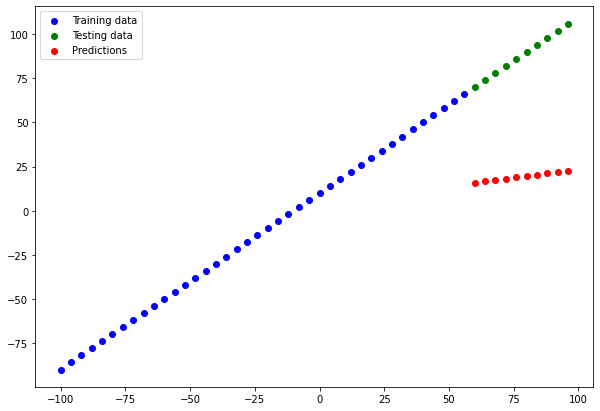

In [105]:
# make and plot predictions for model_3
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions = y_pred_3)

# overfitting

In [99]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.029>)

## Comparing the results of our experiments

In [107]:
# Let's compare our model's results using a pandas dataframe
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2', mae_2.numpy(), mse_2.numpy()],
                ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745329,353.573364
1,model_2,3.196933,13.070086
2,model_3,68.713615,4808.028809


In [ ]:
# Looks like model_2 performed the best

In [108]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments



# Saving our models

    1. SavedModel
    2. HDF5

In [109]:
# Save model using the SavedModel format

model_2.save('best_model_SaveModel_format')

INFO:tensorflow:Assets written to: best_model_SaveModel_format/assets


In [111]:
# Svae model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

# Loading in a saved model

In [113]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SaveModel_format')
loaded_SavedModel_format.summary()

# Same as model_2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Compare model_2 predictions with savedmodel format model predictions
model_2_pred = model_2.predict(x_test)
loaded_SavedModel_format_pred = loaded_SavedModel_format.predict(x_test)

model_2_pred == loaded_SavedModel_format_pred

1/1 [==============================] - 0s 36ms/step


2022-08-16 23:44:33.684035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [117]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Compare model_2 predictions with .h5 format model predictions

loaded_h5_model_pred = loaded_h5_model.predict(x_test)
model_2_pred == loaded_h5_model_pred

1/1 [==============================] - 0s 37ms/step


2022-08-16 23:49:53.152802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])